In [63]:
#import modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm
#tqdm attaches progress bars to iterable elements

In [64]:
#download and tranform datasets
from torchvision import datasets, transforms

mnist_train = datasets.MNIST(root = './datasets', train = True, transform = transforms.ToTensor(), download = True)
mnist_test = datasets.MNIST(root = './datasets', train = False, transform = transforms.ToTensor(), download = True)

In [65]:
#display information about downloaded datasets
print('Number of training samples: {}'.format(len(mnist_train)))
print('Number of testing samples : {}'.format(len(mnist_test)))

Number of training samples: 60000
Number of testing samples : 10000


Default image shape: torch.Size([1, 28, 28])
Reshaped image shape: torch.Size([28, 28])
This image is labelled as: 1


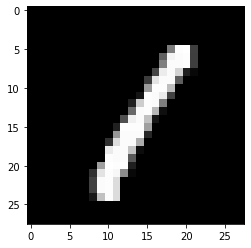

In [66]:
#looking at a data point
image,label  = mnist_train[3] 
#4th image is that of '1'. The index can be between anywhere from 0 - 59999.
#Each element in mnist_train constains a three dimensional numpy array.

#reshaping - removing the grayscale
print('Default image shape: {}'.format(image.shape))
image = image.reshape([28,28])
#this is neccessary in order for matplotlib to plot the image
print('Reshaped image shape: {}'.format(image.shape))

#plotting the image
plt.imshow(image, cmap = 'gray')
#the grayscale is introduced again using cmap

#displaying the label
print('This image is labelled as: {}'.format(label))

In [67]:
#shuffling the data into mini batches
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = 100 , shuffle = True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = 100 , shuffle = False)
#print(train_loader)

In [68]:
#An example of a minibatch
#train_loader is a an object and hence is not iterable.
#therefore an iterable variable is created and only one iteration is displayed
#next() and iter() are used together to iterate through iterable objects.
#next(iterable object, default) - default is printed when there are no more items in the iterable object.
data_train_iter = iter(train_loader)
images, labels = next(data_train_iter)
print("Shape of the minibatch of images: {}".format(images.shape))
print("Shape of the minibatch of labels: {}".format(labels.shape))
print(images)
print(labels)
#If we iterate through the variable again a different set of data points and labels will be displayed.
#images, labels = next(data_train_iter)
#print(images)
#print(labels)

Shape of the minibatch of images: torch.Size([100, 1, 28, 28])
Shape of the minibatch of labels: torch.Size([100])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 

Forward Pass

While our data inputs (which we'll call x) are images (i.e. 2-dimensional), MNIST digits are pretty small, and the model we're using is very simple. Thus, we're going to be treating the input as flat vectors. To convert our inputs into row vectors (a.k.a. flattening), we can use view(), the equivalent of NumPy's reshape().If there is any situation that you don't know how many rows you want but are sure of the number of columns, then you can specify this with a -1. (Note that you can extend this to tensors with more dimensions. Only one of the axis value can be -1). This is a way of telling the library: "give me a tensor that has these many columns and you compute the appropriate number of rows that is necessary to make this happen".

Difference between view() and numpy.reshape()
Unlike reshape, the new tensor returned by "view" shares the underlying data with the original tensor, so it is really a view into the old tensor instead of creating a brand new one. Reshape always copies memory. view never copies memory. 

In [69]:
#flattening out the data
x = images.view(-1,28*28)
print('The shape of input x is: {}'.format(x.shape))
#This means there is a minibatch of 100 train sets each containing a single dimension flattened out array of 784 elements.

The shape of input x is: torch.Size([100, 784])


Matrix equation for logistic regression 

Y = XW + B

m = size of minibatch = 100
c = number of classes (0-9)  = 10
d = dimension of flattened out matrix = 28 * 28 = 784

Y = m * c;
X = m * d;
W = d * c;
B = c * c;

The weights are randomly initialised using the Xavier Initialisation - Multiply the randomly initialised weghts by 1/sqrt(n)

In [70]:
#Initialisation of weights and bias
# The bias can be initialised as zero but the weights can't be as they are multiplied to the data vectors.

W = torch.randn(784,10)/np.sqrt(784)
#torch.randn(takes in the dimensions of the matrix). Each element of the matrix is a randomly generated number
#np.sqrt() is same as math.sqrt() - it's just that we don't need to import the math module
W.requires_grad_() 

B = torch.zeros(10,requires_grad = True)
#torch.zeroes(dimension of the matrix) - generates a matrix of the given length with only zeroes.
#setting requires_grad to true in both cases tells PyTorch's autograd to track the gradients for these two variables, and all the variables depending on W and B.

In [71]:
#Equation
y = torch.matmul(x,W) + B
# x is the flattened out matrix

In [72]:
#raw prediction example
print(y[0,:])

tensor([-0.0270,  0.1676, -0.3097, -0.3453, -0.2312, -0.3693,  0.2840, -0.3461,
         0.4263, -0.0346], grad_fn=<SliceBackward>)


To calculate the loss function we first need to convert the raw prediction values into probabilities which sum up to one. This is done by using the softmax activation funtion.

The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1. It can be seen as an multi-class extension to the binary sigmoid.

Difference between Sigmoid and Softmax:-
Probabilities produced by a Sigmoid are independent. Furthermore, they are not constrained to sum to one.
The outputs of a Softmax function are interrelated. The Softmax probabilities will always sum to one.If the likelihood of one class increases, the others decrease proportionately.

Sigmoid function and signum function are not the same.

Softmax function(yi) = exp(yi)/(summation from j=0 to j = c(exp(yj)))
where c is the number of classes

In [73]:
#Option 1 of implementing softmax (using equation)
p_eq = torch.exp(y)/torch.sum(torch.exp(y), dim = 1, keepdim = True)
print("p_eq[0] from equation: {}".format(p_eq[0]))

#dim is similar to axis in numpy... it determines the direction in which the sum has to take place. 
#keepdim is used to specify if the orginial dimensions are to be retained.
#If dim = 0, the columns are summed up.
#If dim = 1, the rows are summed up.
#If keepdim = False - the sum is always displayed as a 1D tensor

p_eq[0] from equation: tensor([0.1012, 0.1230, 0.0763, 0.0736, 0.0825, 0.0719, 0.1382, 0.0736, 0.1593,
        0.1005], grad_fn=<SelectBackward>)


In [74]:
#Option 2 of implementing softmax (using direct softmax funtion offered by torch)
import torch.nn.functional as F
p = F.softmax(y, dim = 1)
print("p[0] from equation: {}".format(p[0]))

p[0] from equation: tensor([0.1012, 0.1230, 0.0763, 0.0736, 0.0825, 0.0719, 0.1382, 0.0736, 0.1593,
        0.1005], grad_fn=<SelectBackward>)


Cross Entropy Loss function
Actual formula is quite complex so directly use the implemented cross entropy function in the torch.nn.functional module

In [75]:
#Implementing cross entropy
print(labels.shape)
#labels store the actual labels of the data
cross_entropy = F.cross_entropy(y,labels)
print("cross entropy with torch.nn.functional.cross_entropy: {}".format(cross_entropy))

'''Note that PyTorch's cross-entropy loss combines the softmax operator and cross-entropy into a single operation, 
for numerical stability reasons. Don't do the softmax twice! Make sure to feed in the pre-softmax logits y,
not the post-softmax probabilities py.'''

torch.Size([100])
cross entropy with torch.nn.functional.cross_entropy: 2.390179395675659


"Note that PyTorch's cross-entropy loss combines the softmax operator and cross-entropy into a single operation, \nfor numerical stability reasons. Don't do the softmax twice! Make sure to feed in the pre-softmax logits y,\nnot the post-softmax probabilities py."

The Backward Pass(Back propagation)
We use the stochastic gradient descent as it works well with logistic regression. 

In [76]:
#First all the variables(B and W) which require gradients are assigned gradients by using the backward() function
#This has an enabled auto differentiation which computes(not assigns) gradients for each variable requiring one.
cross_entropy.backward()

In [77]:
#The gradient computed for the bias.
B.grad

tensor([-0.0101, -0.0379, -0.0308, -0.0784,  0.0350, -0.0148,  0.0897, -0.0169,
         0.0800, -0.0158])

In [83]:
#The gradient computed for the weights - in this case the gradient turns out to be 0 for almost all the cases.
W.grad

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [78]:
#The inbuilt stocastic gradient descent available in pytorch is applied to create an optimizer 
#This would later assign the computed gradients.
optimizer = torch.optim.SGD([W,B], lr=0.1)

In [79]:
#The B before the gradient is assigned to B
print(B)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


In [80]:
#Assigning stochastic gradient descent to all the variables having computed gradient
optimizer.step()

In [81]:
#The Bias after backpropagation.
print(B)

tensor([ 0.0010,  0.0038,  0.0031,  0.0078, -0.0035,  0.0015, -0.0090,  0.0017,
        -0.0080,  0.0016], requires_grad=True)


In [ ]:
#The weight after backpropagation - in this case it remains unchanged as the weights had a gradient of 0.

In [82]:
#The gradients keep on accumulating and hence it is neccessary to clear the gradients from the buffer after computing a mini batch.
optimizer.zero_grad()

In [84]:
#The gradient of the bias is reset to 0.
print(B.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


To train the model, we just need repeat what we just did for more minibatches from the training set. As a recap, the steps were:

1.Draw a minibatch
2.Zero the gradients in the buffers for W and b
3.Perform the forward pass (compute prediction, calculate loss)
4.Perform the backward pass (compute gradients, perform SGD step)

Going through the entire dataset once is referred to as an epoch. In many cases, we train neural networks for multiple epochs, but here, a single epoch is enough. We also wrap the train_loader with tqdm. This isn't neccessary, but it adds a handy progress bar so we can track our training progress.
In the training process all we need to do is determine W and B as accurately as possible by iterating through several mini batches. Then they are finally tested with the testing data and we try to determine the accuracy of the model.

THE TESTING PROCESS
(Just the sample code)
correct = 0
total = len(mnist_test)
#Autograd engine is turned of  is turned of which increases the speed of the iterations
with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, 28*28)
        y = torch.matmul(x, W) + b
        
        #y here is sort of a one-hot coding vector...so the index with the highest value 
        (confidence) will be the predicted digit. 
        
        #torch.argmax() gives the  index of the highest value. dim = 1 refers to the x axis(rows)
        
        predictions = torch.argmax(y, dim=1)
        
        #the prediction is compared to the labels which correspond the current image. 
        #The labels also range from 0-9 just like the predictions which also range from (0-9) index.
        
        correct += torch.sum((predictions == labels).float())
        #.float() converts the values of 1 or 0 into floating point numbers which are then summed up...Just do it.
        
print('Test accuracy: {}'.format(correct/total))
#The final test accuracy is obtained by dividing the total correct by the total data.

THE ENTIRE CODE IN ONE GO

In [13]:
#Importing modules
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import torch.nn.functional as F
from tqdm.notebook import tqdm

#Loading the data
mnist_train = datasets.MNIST(root = './datasets', train = True, transform = transforms.ToTensor(), download = True)
mnist_test = datasets.MNIST(root = './datasets', train = False, transform = transforms. ToTensor(), download = True)

#Distributing the data
train_batch = torch.utils.data.DataLoader(mnist_train, batch_size = 100, shuffle = True)
test_batch = torch.utils.data.DataLoader(mnist_test, batch_size = 100, shuffle = False)

#Initialising the parameters
W = torch.randn(784,10)/np.sqrt(784)
W.requires_grad_()
B = torch.zeros(10, requires_grad = True)

#Creating the Optimizer - for weights and biases
optimizer = torch.optim.SGD([W,B], lr = 0.7)

#Training
print('Traning Phase...')
for images,labels in tqdm(train_batch):
    #clear the gradients
    optimizer.zero_grad()
    
    #Forward pass
    X = images.view(-1, 28*28)
    Y = torch.matmul(X,W) + B
    #Calculating loss
    ce_loss = F.cross_entropy(Y,labels)
    
    #Backward pass
    ce_loss.backward()
    optimizer.step()
print('Training Over.\n')

#Testing
correct = 0
total = len(mnist_test)

print('Testing Phase...')
for image, label in tqdm(test_batch):
    x = image.view(-1,28*28)
    y = torch.matmul(x,W) + B
    
    pred = torch.argmax(y, dim = 1)
    correct += torch.sum((pred == label).float())
print('Testing Over.\n')

#Calculating accuracy
print('The accuracy of the logistic regression model is: {} %'.format(correct*100/total))

Traning Phase...


  0%|          | 0/600 [00:00<?, ?it/s]

Training Over.

Testing Phase...


  0%|          | 0/100 [00:00<?, ?it/s]

Testing Over.

The accuracy of the logistic regression model is: 91.86000061035156 %
